# **Lab 2 : Direct method of Interpolation**<br>

Interpolation is the process of estimating unknown data that lies within the range of some known data. The simplest interpolation is the **Direct method of Interpolation**. In order to interpolate unknown data, one needs to define a model that would fit the known data and based on that model, one would obtain the unknown data. This model would basically be a function that tries to satisfy the known data points. There can be various types of functions that may satisfy the same given data points, but for interpolation, we usually choose **polynomials** as interpolating functions due to the fact that polynomials are very easy to evaluate, differentiate and integrate.

In today's lab, we will be implementing the Direct method of Interpolation in python. To test our implementation, we will be using the same data that we used during our class lectures. Run the following cell to load the known data points:


In [1]:
t = [0, 10, 15, 20, 22.5, 30]
v = [0, 227.04, 362.78, 517.35, 602.97, 901.67]

##Task 1
Design a utility function that will be called in the `DirectInterpolation` function. The purpose of this function will be to find the $n+1$ closest points to the unknown value $t_{new}$ where we want to interpolate the data, where $n$ is the order of the interpolating polynomial. Understand that the nearest points should be selected such that they bracket the $t_{new}$. The function to be implemented is as follows:

In [29]:
def NearestPoints(t, v, n, t_new):
  #Write your implementation here

  t_nearest = []
  v_nearest = []
  indices = []

  for i in range(n+1):

    diff = float('inf')
    index = 0

    for j in range(len(t)):

      if j not in indices:
        if diff > abs(t_new - t[j]):

          diff = abs(t_new - t[j])
          index = j

    if index is not None:
      indices.append(index)
      t_nearest.append(t[index])
      v_nearest.append(v[index])

  return t_nearest, v_nearest

The above function is supposed to return two vectors, say `t_nearest` and `v_nearest` consisting of $n+1$ elements each. For testing how the function works, we can print the data and see what we are getting. If our implementation is correct, then we should be getting $[15], [362.78]$ for $n=0$. Run the following cell to check this:

In [30]:
n = 0
t_new = 16

t_nearest, v_nearest = NearestPoints(t, v, n, t_new)
print(t_nearest)
print(v_nearest)

[15]
[362.78]


In [31]:
n = 1
t_new = 16

t_nearest, v_nearest = NearestPoints(t, v, n, t_new)
print(t_nearest)
print(v_nearest)

[15, 20]
[362.78, 517.35]


The output for $n=1$ should be $[15, 20], [362.78, 517.35]$

In [32]:
n = 2
t_new = 16

t_nearest, v_nearest = NearestPoints(t, v, n, t_new)
print(t_nearest)
print(v_nearest)

[15, 20, 10]
[362.78, 517.35, 227.04]


The output for $n=2$ should be $[15, 20, 10], [362.78, 517.35, 227.04]$

## Task 2
Now your task is to design a generalized function that takes the given data as parameters as well as the order $n$ of the polynomial and uses the *Direct Interpolation* method to interpolate the unknown data at $t_{new}$. The following cell contains the function to be implemented:

In [39]:
import numpy as np
def DirectInterpolation(t, v, n, t_new):
    #Write your implementation here.

    t_nearest, v_nearest = NearestPoints(t, v, n, t_new)

    A = np.zeros((n+1, n+1))

    for i in range(n+1):
      for j in range(n+1):

        A[i][j] = t_nearest[i] ** j


    B = np.array(v_nearest)

    x = np.linalg.solve(A, B)

    return x

def eval(f, t_new):
    #Write your implementation here.

    result = 0

    for i in range(len(f)):
      result += f[i] * (t_new**i)

    return result


Note that the above function will at first need to find a number of closest points to the unknown data $t_{new}$, and this number will vary depending on the order $n$ of the polynomial that we want to use as the interpolating function. So you will have to call the function you implemented in Task 1 inside this function.

In [40]:
print(eval(DirectInterpolation(t, v, 1, 16), 16))

393.69399999999996


For $n=1$, we should get $v(16) = 393.7ms^{-1}$.

In [42]:
print(eval(DirectInterpolation(t, v, 2, 16), 16))

392.1876


For $n=2$, we should get $v(16) = 392.19ms^{-1}$.

In [43]:
print(eval(DirectInterpolation(t, v, 3, 16), 16))

392.05716799999993


For $n=2$, we should get $v(16) = 392.06ms^{-1}$.

##Task 3
Now, test the function using different order of polynomials, setting $n = 1, 2,$ and $3$ and so on and print the absolute relative approximate error at each step. Also generate a plot of Order $(n)$ vs Relative Approximate Error $(|\epsilon_a|\%)$. In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the `matplotlib` library.

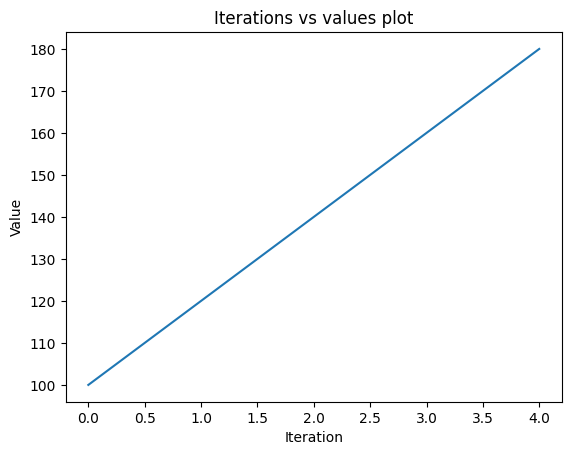

In [44]:
import numpy as np
import matplotlib.pyplot as plt

iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

[0.3841018940935372, 0.03326861760120699, 0.004219342657274461, 0.0007988402971966851]


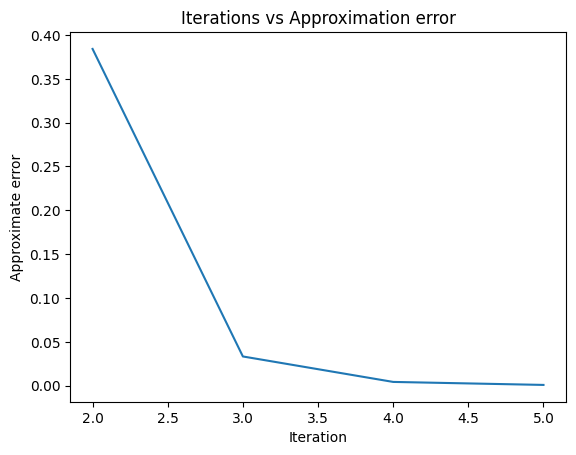

In [57]:
# Write your code here for finding the relative approximate errors for different orders of the polynomial

def relative_approximate_errors(order):
  app_errors = []
  f_prev = 0
  f_new = 0
  for i in range(1, order+1):

    f_new = eval( DirectInterpolation(t, v, i, 16), 16 )

    if i != 1:
      app_errors.append( (abs(f_new - f_prev)/f_new)* 100 )

    f_prev = f_new

  return app_errors

errs = relative_approximate_errors(5)
print(errs)
vals = [2, 3, 4, 5]

plt.plot(vals, errs)
plt.title("Iterations vs Approximation error")
plt.xlabel("Iteration")
plt.ylabel("Approximate error")
plt.show()


##Task 4
Now, write a function for evaluating the acceleration at $t = 16$

In [90]:
#implement the acceleration function
def acceleration(f, t_new):
  # write your code here
  derivative = 0
  #print(f)
  for i in range(1, len(f)):
    derivative += i * (f[i]) * (t_new ** (i-1))
    #print(derivative)
  return derivative



In [91]:
print(acceleration(DirectInterpolation(t, v, 2, 16), 16))

29.784200000000006
